## 재미로 보는 스팀의 가격 향방
지난번 prophet을 이용해 비트코인 가격 향방을 살펴봤는데요.
[[Python!] 지옥으로 가는(?) 비트코인 가격을 예측해보자.](https://busy.org/@yoon/4wtfau-python)

이번에는 재미로 스팀 가격이 어떻게 될지 보고자 합니다. 
스팀 데이터를 코인마켓캡에서 가져와도 되는데, 야후 파이낸스에서 가격을 제공하네요. 기존에 짰던 명령어를 조금만 수정하면 되니 여기에서 가져옵니다.

`STEEM = web.DataReader('STEEM-USD','yahoo',start,end)`

In [11]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from fbprophet import Prophet

start = datetime(2015, 1, 1)
end = datetime(2018, 11, 23)

STEEM = web.DataReader('STEEM-USD','yahoo',start,end)
STEEM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-16,0.5030,0.2984,0.3623,0.4049,3552,0.4049
2016-04-17,1.0600,0.2997,0.4063,0.8340,34630,0.8340
2016-04-18,0.9655,0.6959,0.8481,0.7568,25985,0.7568
2016-04-19,0.9706,0.7059,0.7676,0.8325,29090,0.8325
2016-04-20,0.8479,0.6268,0.8479,0.6718,34958,0.6718


2016년 4월 16일부터 가격이 있습니다. 종가가 0.4달러 정도였으니, 지금보다 비쌌네요. 쿨럭.

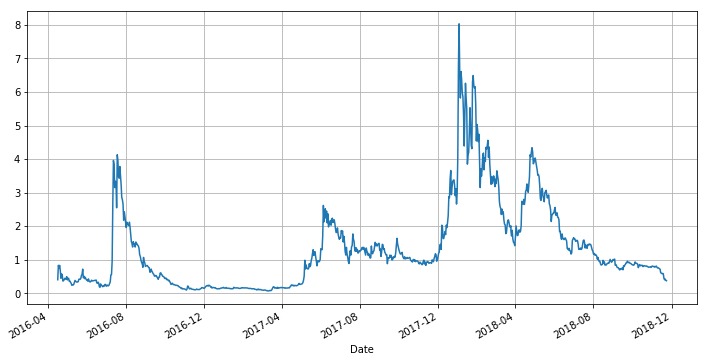

In [12]:
STEEM['Close'].plot(figsize=(12,6), grid=True);

그래프를 그려 봅니다. 급등과 급락을 반복하며, 지금은 가파르게 하락하고 있는 추세입니다.
시계열 ds와 종가 y만 정리합니다.

In [13]:
df = pd.DataFrame({'ds':STEEM.index, 'y':STEEM['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2016-04-16,0.4049
1,2016-04-17,0.8340
2,2016-04-18,0.7568
3,2016-04-19,0.8325
4,2016-04-20,0.6718


In [21]:
m = Prophet(daily_seasonality=True)
m.fit(df);
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
1036,2019-02-17
1037,2019-02-18
1038,2019-02-19
1039,2019-02-20
1040,2019-02-21


In [22]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1036,2019-02-17,0.860270,-0.017986,1.748664
1037,2019-02-18,0.857767,-0.047551,1.698069
1038,2019-02-19,0.841299,-0.059899,1.734971
1039,2019-02-20,0.823259,-0.017728,1.660115
1040,2019-02-21,0.766722,-0.108740,1.641315


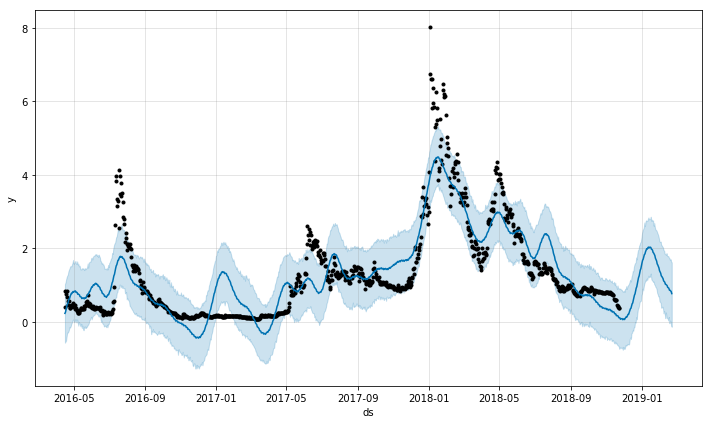

In [16]:
m.plot(forecast);

하락이 이제 거의 막바지에 도달한 걸까요? 올해 말부터 상승으로 전환하는 걸로 예측합니다. 근데 그후에 다시 하락이... 
재미로만 봐주세요.

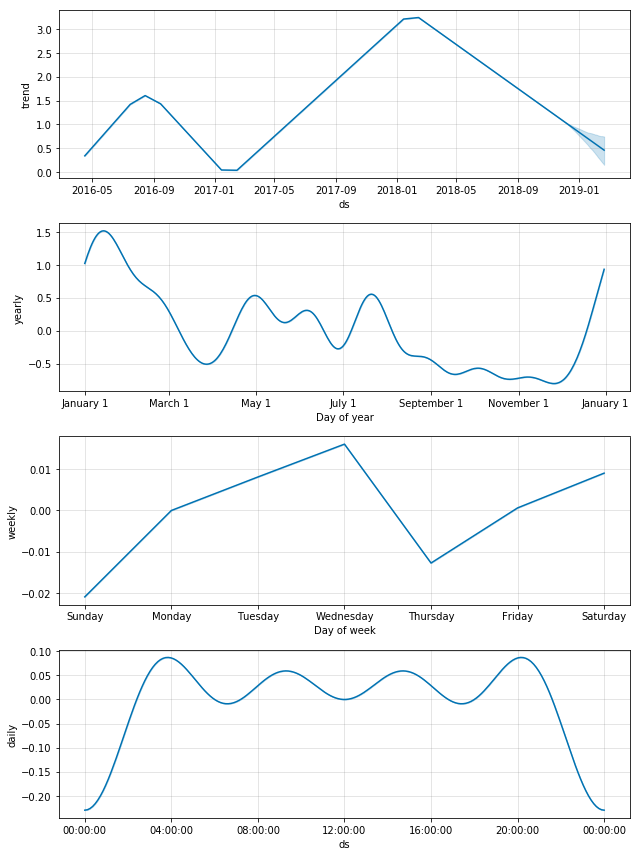

In [17]:
m.plot_components(forecast);

시기적으로 보았을 때 스팀은 1월에 강세였고, 11월 약세였습니다. 12월부터 상승장에 들어갔습니다. 물론, 2016년, 2017년 두 번의 통계인 겁니다.
요일별로는 일요일에 가장 가격이 낮았고, 수요일이 가장 높았네요. 수요일에서 목요일로 넘어갈 때, 토요일에서 일요일로 넘어갈 때 하락장이 많았나 봅니다.